# Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable. Source : [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

Formula : 
<br/>
<img src="http://bit.ly/31ntjlb" align="center" border="0" alt="a = \frac{\sum (x \times M(x))(y \times M(y))}{\sum (x - M(x)^2)}" width="224" height="49" />

data from : [http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from load_data import fetch_data
import pandas

In [2]:
fetch_data("https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls","./data","data.xls")

In [3]:
data = pandas.read_excel("./data/data.xls")
data

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
X    15 non-null float64
Y    15 non-null float64
dtypes: float64(2)
memory usage: 320.0 bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16d59aa7f0>,
      dtype=object)

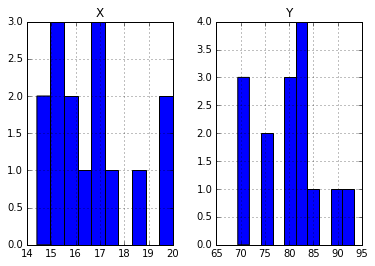

In [5]:
%matplotlib inline 
data.hist()

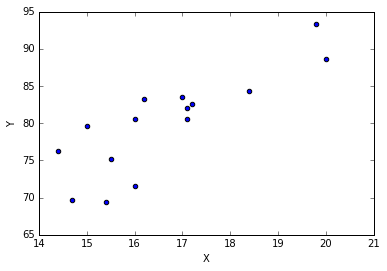

In [6]:
data.plot(kind="scatter", x="X", y="Y")

In [7]:
X = np.array(data["X"])
Y = np.array(data["Y"])

print(X.mean())
print(Y.mean())


16.653333345999997
80.03999989666666


In [8]:
a = np.sum( (X - X.mean())*((Y-Y.mean())) ) / np.sum((X - X.mean())**2)
a

3.2910945679475656

In [9]:
b = Y.mean() - a * X.mean()
b

25.232304983426012

In [10]:
def predict(a, b, value):
    return a * value + b

def plot_line(a, b, X):
    plt.plot([X.min(),X.max()],[predict(a,b,X.min()),predict(a, b, X.max())],"-r")

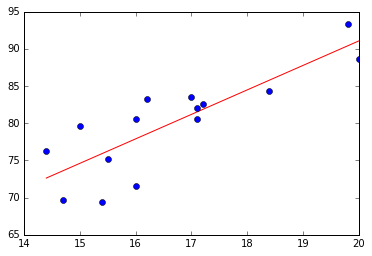

In [11]:
plot_line(a, b, X)
plt.plot(X,Y,"bo")
plt.show()

## Root of Mean square error
RMSE = sqrt((sum(predicted - y)**2)/2)

In [12]:
mse = np.sum(((a * X + b) - Y) ** 2) / X.shape[0]
mse

12.703159294898056

In [13]:
rmse = np.sqrt(mse)
rmse

3.5641491684409137